# Correlation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
![ ! -f "./bodyfat/Bodyfat.csv" ] && git clone "https://gist.github.com/eee599d5256f9db493a6eab32e1dcbcf.git" ./bodyfat/

In [3]:
body_fat = pd.read_csv("./bodyfat/Bodyfat.csv")

In [4]:
body_fat.sample(10)

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
28,1.0910,3.7,27,133.25,64.75,36.4,93.5,73.9,88.5,50.1,34.5,21.3,30.5,27.9,17.2
210,1.0829,7.1,49,140.50,68.00,35.8,91.2,79.4,89.0,51.1,35.0,21.7,30.9,28.8,17.4
132,1.0452,23.6,47,197.00,73.25,37.8,103.6,99.8,103.2,61.2,38.1,22.6,33.5,28.6,17.9
94,1.0785,9.0,47,184.25,74.50,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8
219,1.0646,15.0,53,154.50,69.25,37.6,93.9,88.7,94.5,53.7,36.2,22.0,28.5,25.7,17.1
95,1.0991,17.4,53,224.50,77.75,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
241,1.0207,35.0,65,224.50,68.25,38.8,119.6,118.0,114.3,61.3,42.1,23.4,34.9,30.1,19.4
83,1.0377,27.0,70,170.75,70.00,38.7,101.8,94.9,95.0,56.0,36.5,24.1,31.2,27.3,19.2
71,1.0788,8.8,55,146.75,68.75,38.7,88.5,82.8,95.5,58.9,37.6,21.6,30.3,27.3,18.3
47,1.0665,5.6,39,148.50,71.25,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9


In [5]:
weight_height = body_fat.filter(["Weight", "Height"])

In [6]:
weight_height.corr()

,Weight,Height
Weight,1.000000,0.308279
Height,0.308279,1.000000


# Scatter Plot

Text(0.5, 1.0, 'Scatter plot of Height vs. Weight')

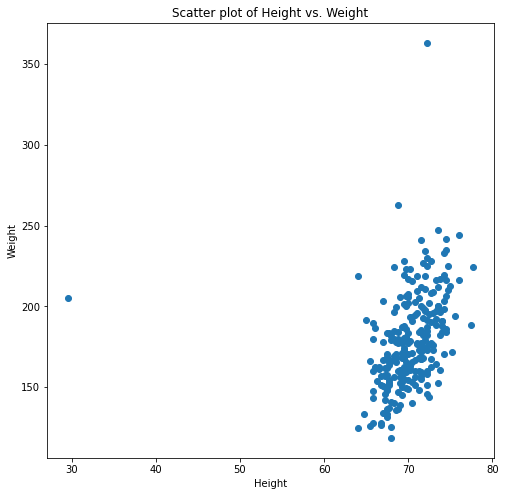

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(body_fat['Height'], body_fat['Weight'])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatter plot of Height vs. Weight")

# Remove Outliers By $1.5IQR$

In [8]:
height_iqr = weight_height['Height'].quantile(0.75) - weight_height['Height'].quantile(0.25)
weight_iqr = weight_height['Weight'].quantile(0.75) - weight_height['Weight'].quantile(0.25)

height_iqr_lower = weight_height['Height'].quantile(0.25) - 1.5 * height_iqr
height_iqr_upper = weight_height['Height'].quantile(0.75) + 1.5 * height_iqr
weight_iqr_lower = weight_height['Weight'].quantile(0.25) - 1.5 * weight_iqr
weight_iqr_upper = weight_height['Weight'].quantile(0.75) + 1.5 * weight_iqr

In [9]:
body_fat_clean = weight_height[(body_fat['Height'] > height_iqr_lower) &
                               (body_fat['Height'] < height_iqr_upper) &
                               (body_fat['Weight'] < weight_iqr_upper) &
                               (body_fat['Weight'] > weight_iqr_lower)]

In [10]:
body_fat_clean

,Weight,Height
0,154.25,67.75
1,173.25,72.25
2,154.00,66.25
3,184.75,72.25
4,184.25,71.25
...,...,...
247,134.25,67.00
248,201.00,69.75
249,186.75,66.00
250,190.75,70.50


This doesn't look good because we've lost a lot of data due to the stretched shape of the blob.

Text(0.5, 1.0, 'Scatter plot of Height vs. Weight')

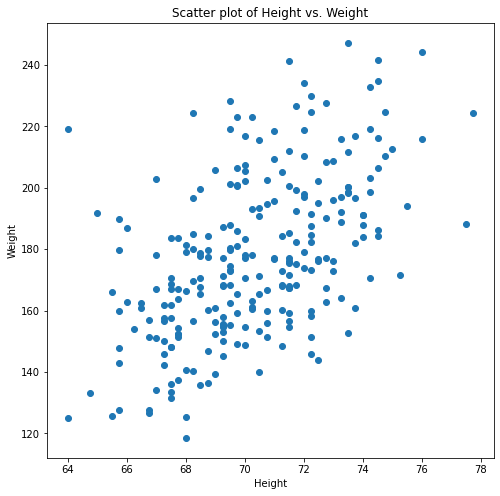

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(body_fat_clean['Height'], body_fat_clean['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter plot of Height vs. Weight')

In [12]:
body_fat_clean.corr()

,Weight,Height
Weight,1.000000,0.531391
Height,0.531391,1.000000


# Prediction

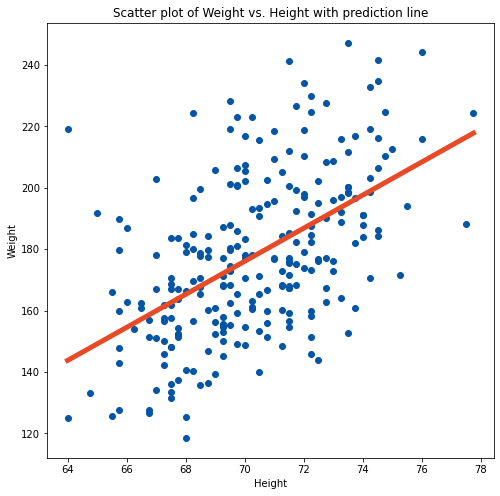

In [13]:
x_vals = np.array([np.min(body_fat_clean["Height"]), np.max(body_fat_clean["Height"])])
x_vals_standardized = (x_vals - body_fat_clean["Height"].mean()) / body_fat_clean["Height"].std(ddof=0)
y_predictions_standardized = body_fat_clean.corr()["Height"]["Weight"] * x_vals_standardized
y_predictions = y_predictions_standardized * body_fat_clean["Weight"].std(ddof=0) + body_fat_clean["Weight"].mean()
plt.figure(figsize=(8,8))
plt.scatter(body_fat_clean['Height'], body_fat_clean['Weight'], color='#0455A4')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Scatter plot of Weight vs. Height with prediction line")
plt.plot(x_vals, y_predictions, color='#E84A27', linewidth=5)